# Advertising Sales Prediction Using regression 

In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt

In [150]:
df= pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [41]:
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

So as there are no Null values present we can move onto the next step Data Analysis

Also, we can drop the unnamed column which is basically ithe index and the model will not learn any valueable information from it to create a model for prediction

In [155]:
df = df.drop(df.columns[0],axis=1)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# EDA:

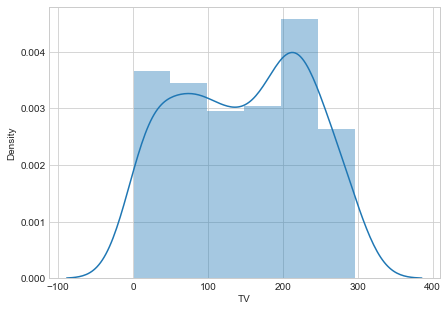

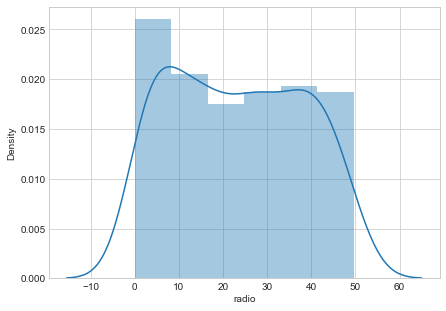

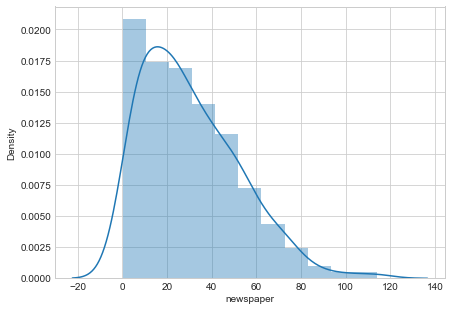

In [52]:

for i in df.columns[:3]:
    plt.figure(figsize=(7,5))
    k = sns.distplot(df[i],kde=True)
    plt.show()

We can infer from these graphs that feature variables have skewness and it needs to be rectified.

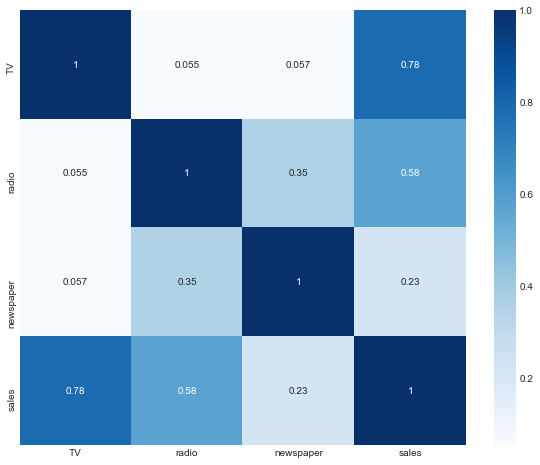

In [104]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

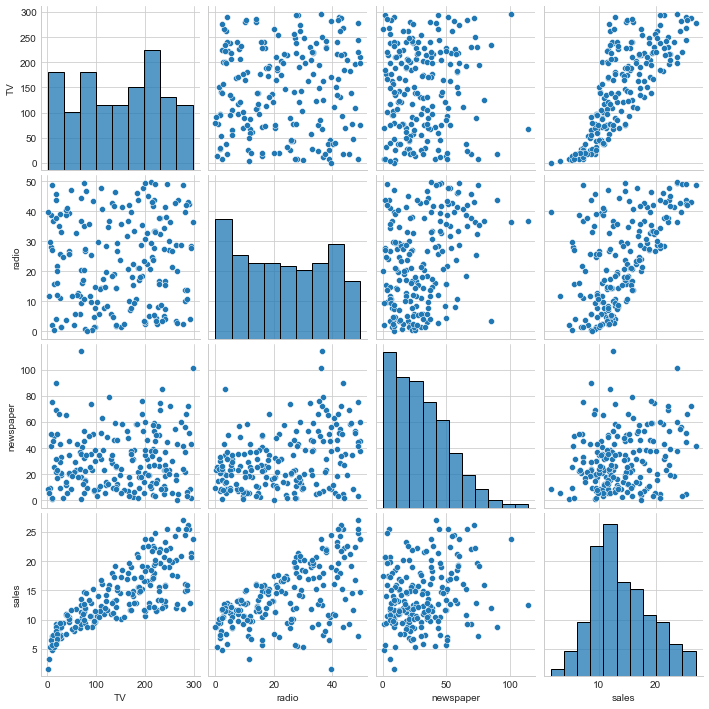

In [65]:
sns.pairplot(df)

# Checking Outliers:

In [75]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


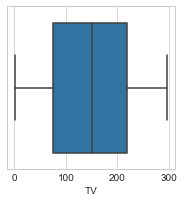

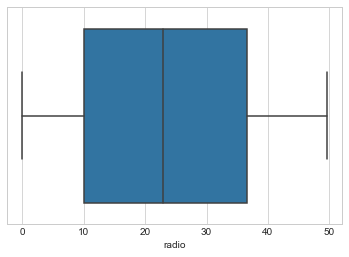

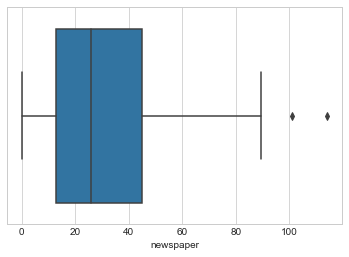

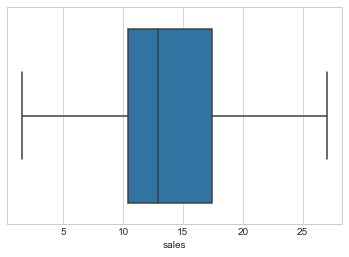

In [78]:
plt.figure(figsize=(3,3))
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

As evident from the above plots, we have outliers present in the column of newspapers

In [151]:
from scipy import stats

In [156]:
t = np.abs(stats.zscore(df))

In [157]:
print(np.where(t > 3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [158]:
t.shape

(200, 4)

In [164]:
df_new = df[(t < 3).all(axis=1)]

In [165]:
df_new.shape

(198, 4)

# Removing Skewness:

In [103]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

As we can see the skewness in the newspaper column is above the permissible limit of +/= 0.5 so, we'll apply transformation to this column 

In [105]:
df_new["newspaper"]=np.sqrt(df_new["newspaper"])


In [106]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

We can see that all the columns have a compatible skewness.

# Checking Multicollinearity:

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [109]:
# the independent variables set
X = df_new.columns[:3]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns[:3]
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(3)]


In [110]:
vif_data

,feature,VIF
0,TV,23.652523
1,radio,12.171115
2,newspaper,5.586619


Multicollinearity exists, but removing even a single feature can result in a huge data loss as this dataset is really small to pass on the risk of MC on the model. Hence, we'll leave it as it is.  

We can proceed to the next step, of model making

In [167]:
x = df_new.iloc[:,:-1]   #independent feaures

y = df_new.iloc[:,-1]  #dependent/target feature

In [170]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [169]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [171]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Model 1 : Linear Regression

In [194]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
pred_lr= lr.predict(xtest)

In [195]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lrr2 = r2_score(ytest,pred_lr)

for k in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lrr2*100)
    print("\n")

At cv=  2
Cross Val score :  88.86177292201751
r2 score is :  89.89454779619588


At cv=  3
Cross Val score :  88.90406332045909
r2 score is :  89.89454779619588


At cv=  4
Cross Val score :  88.80501918930908
r2 score is :  89.89454779619588


At cv=  5
Cross Val score :  88.53605756683912
r2 score is :  89.89454779619588


At cv=  6
Cross Val score :  88.68174285063071
r2 score is :  89.89454779619588


At cv=  7
Cross Val score :  88.3828289486476
r2 score is :  89.89454779619588


At cv=  8
Cross Val score :  88.80334554150218
r2 score is :  89.89454779619588


At cv=  9
Cross Val score :  88.10485430282272
r2 score is :  89.89454779619588




Hence we can choose cv to be 3 , where cv score is the max.

In [185]:
lsscore_selected = cross_val_score(lr,x,y,cv = 3).mean()
print("The cv score is: ", lsscore_selected, "\nThe r2 score is: ",lrr2)

The cv score is:  0.8890406332045909 
The r2 score is:  0.8989454779619588


# Model 2: Ridge Regression

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
rid_reg_params = {"alpha":[1,10],"solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]}
grid_rid_reg = GridSearchCV(Ridge(), rid_reg_params)
grid_rid_reg.fit(xtrain, ytrain)

rid_reg = grid_rid_reg.best_estimator_
print("Best Estimators for Ridge Regression: ", rid_reg)

print("------------------------------------------")

Best Estimators for Ridge Regression:  Ridge(alpha=1, solver='sag')
------------------------------------------


In [198]:
ridge = Ridge(alpha=1,solver="sag")
ridge.fit(xtrain, ytrain)
pred_ridge= ridge.predict(xtest)

In [210]:
ridr2 = r2_score(ytest,pred_ridge)

for k in range(2,10):
    ridscore=cross_val_score(ridge,x,y,cv=k)
    ridcv=ridscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",ridcv*100)
    print("r2 score is : ",ridr2*100)
    print("\n")

At cv=  2
Cross Val score :  84.56963763661525
r2 score is :  89.9029886648175


At cv=  3
Cross Val score :  84.34899616619674
r2 score is :  89.9029886648175


At cv=  4
Cross Val score :  84.42316934150647
r2 score is :  89.9029886648175


At cv=  5
Cross Val score :  84.2268622464806
r2 score is :  89.9029886648175


At cv=  6
Cross Val score :  84.13590653791307
r2 score is :  89.9029886648175


At cv=  7
Cross Val score :  83.72094014680692
r2 score is :  89.9029886648175


At cv=  8
Cross Val score :  84.04644844779018
r2 score is :  89.9029886648175


At cv=  9
Cross Val score :  83.52036558439347
r2 score is :  89.9029886648175




In [211]:
ridscore_selected = cross_val_score(ridge,x,y,cv = 2).mean()
print("The cv score is: ", ridscore_selected, "\nThe r2 score is: ",ridr2)

The cv score is:  0.8456963763661526 
The r2 score is:  0.899029886648175


# Model 3 : Decision Tree Regression

In [206]:
from sklearn.tree import DecisionTreeRegressor
dt_reg_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(xtrain, ytrain)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)

print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 20}
------------------------------------------


In [205]:
print("best r2 score: ",grid_dt_reg.best_score_)

best r2 score:  0.7300791969126935


In [208]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth= 6, max_leaf_nodes= 100, min_samples_leaf= 20, min_samples_split= 20)
dtr.fit(xtrain, ytrain)
pred_dtr= dtr.predict(xtest)

In [212]:
dtrr2 = r2_score(ytest,pred_dtr)

for k in range(2,10):
    dtrscore=cross_val_score(dtr,x,y,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  74.99789805440297
r2 score is :  87.83893294740938


At cv=  3
Cross Val score :  78.82864480620114
r2 score is :  87.83893294740938


At cv=  4
Cross Val score :  82.73331885268223
r2 score is :  87.83893294740938


At cv=  5
Cross Val score :  83.03622438952712
r2 score is :  87.83893294740938


At cv=  6
Cross Val score :  82.94885309080735
r2 score is :  87.83893294740938


At cv=  7
Cross Val score :  83.69051759360617
r2 score is :  87.83893294740938


At cv=  8
Cross Val score :  84.11654644868459
r2 score is :  87.83893294740938


At cv=  9
Cross Val score :  84.67089387949758
r2 score is :  87.83893294740938




At cv = 9 , The cross validation is 84.7% ; 
The r2 score is 87.8%

# Model 4 : Random Forest Regressor

In [215]:
from sklearn.ensemble import RandomForestRegressor
rf_reg_params =  { 'max_depth': [5,7,10], "criterion": ["squared_error", "absolute_error", "poisson"],
                  'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [50,100,150,200]}
grid_rf_reg = GridSearchCV(RandomForestRegressor(), rf_reg_params)

grid_rf_reg.fit(xtrain, ytrain)

rf_reg = grid_rf_reg.best_estimator_
print(rf_reg)
print("Best Estimators for Decision Tree Regression: ", grid_rf_reg.best_params_)

print("------------------------------------------")

RandomForestRegressor(criterion='poisson', max_depth=10, max_features='log2',
                      n_estimators=150)
Best Estimators for Decision Tree Regression:  {'criterion': 'poisson', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150}
------------------------------------------


In [219]:
print("best r2 score: ",grid_rf_reg.best_score_)

best r2 score:  0.52458858998389


In [216]:
rf = RandomForestRegressor(criterion='poisson', max_depth=10, max_features='log2', n_estimators=150)
rf.fit(xtrain, ytrain)
pred_rf= rf.predict(xtest)

In [218]:
rfr2 = r2_score(ytest,pred_rf)

for k in range(2,10):
    rfscore=cross_val_score(rf,x,y,cv=k)
    rfcv=rfscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rfcv*100)
    print("r2 score is : ",rfr2*100)
    print("\n")

At cv=  2
Cross Val score :  48.54165810875813
r2 score is :  51.8073503527825


At cv=  3
Cross Val score :  51.93598501095947
r2 score is :  51.8073503527825


At cv=  4
Cross Val score :  50.242498740683786
r2 score is :  51.8073503527825


At cv=  5
Cross Val score :  50.549090573565024
r2 score is :  51.8073503527825


At cv=  6
Cross Val score :  49.140580376416246
r2 score is :  51.8073503527825


At cv=  7
Cross Val score :  49.88154685977047
r2 score is :  51.8073503527825


At cv=  8
Cross Val score :  49.6010832037627
r2 score is :  51.8073503527825


At cv=  9
Cross Val score :  48.736210070373936
r2 score is :  51.8073503527825




At CV = 3 , Cross validation score is 51.9% whereas the r2 score is 51.8 % which is the lowest among the 4 models.

We can see that the ridge regression is the best model among these with an r2 score of 89.9% which is marginally better than linear regression.

# Saving the model

In [221]:
import pickle
filename = "Advert_Sales_pred.pkl"
pickle.dump(ridge,open(filename,'wb'))

# Conclusion

In [226]:
h = np.array(ytest)
predicted = np.array(pred_ridge)
df_comp = pd.DataFrame({"original":h, "predicted":predicted},index=range(len(h)))
df_comp

,original,predicted
0,9.5,8.882314
1,12.2,12.010933
2,24.4,23.234398
3,10.4,8.917673
4,7.3,10.450052
5,24.7,21.905014
6,20.1,19.211149
7,11.9,11.450353
8,14.6,14.096132
9,15.0,17.820277


In [227]:
print("the r2 score: ",r2_score(ytest,pred_ridge))

the r2 score:  0.899029886648175
